In [34]:
import os
import pandas as pd
import numpy as np
from mpmath import mp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
import matplotlib.lines as mlines
from matplotlib.ticker import ScalarFormatter
import scienceplots

plt.style.use('science')

In [9]:
eigenvalues = pd.read_csv('eigenvalues.dat', header=None)
c = 137
eigenvalues

,0
0,-1.028279e+06
1,-6.934245e+05
2,-6.190086e+05
3,-5.134336e+05
4,-4.822940e+05
...,...
191,4.680203e+05
192,4.860448e+05
193,6.351369e+05
194,6.800503e+05


0.2 0.200015625 -0.00015 0.0001


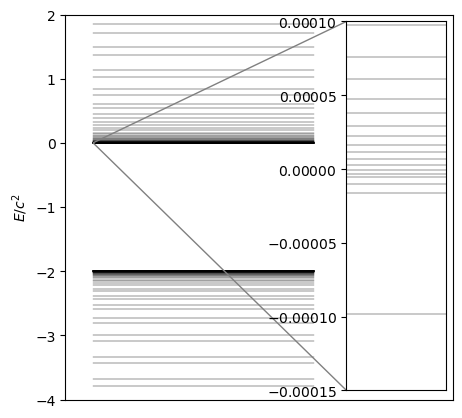

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(len(eigenvalues)):
    ax.plot([0.2, 1], [eigenvalues.iloc[i, 0]/(c**2), eigenvalues.iloc[i, 0]/(c**2)], color='black', linewidth=0.3)

ax.set_xlim(0.1, 1.5)
ax.set_ylim(-4, 2)
ax.set_ylabel(r'$E / c^2$')
ax.get_xaxis().set_visible(False)

ax2 = zoomed_inset_axes(ax, 2.3E4, loc=1)
for i in range(len(eigenvalues)):
    ax2.plot([0.2, 1], [eigenvalues.iloc[i, 0]/(c**2), eigenvalues.iloc[i, 0]/(c**2)], color='black', linewidth=0.3)

y1, y2 = -0.00015, 0.0001
x1, x2 = 0.2, (x1 + (y2-y1)/16)
print(x1, x2, y1, y2)
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.get_xaxis().set_visible(False)

y_formatter = ScalarFormatter(useOffset=False, useMathText=True)
ax2.get_yaxis().set_major_formatter(y_formatter)

mark_inset(ax, ax2, loc1=2, loc2=3, fc="none", ec="0.5")

plt.show()

# Study of DKB result

In [36]:
folder_path = 'result_DKB'
dir_file = os.listdir(folder_path)

error_1 = np.empty([len(dir_file), 200])
error_1.fill(np.nan)
n_list_1 = np.zeros(len(dir_file), dtype=int)
order_list_1 = np.zeros(len(dir_file), dtype=int)
i = 0
for filename in os.listdir(folder_path):
    if "error" in filename:
        print(filename)
        nbspline, order = [int(x) for x in filename[:-4].split('_')[1:]]
        n_list_1[i] = nbspline
        order_list_1[i] = order
        data = pd.read_csv(os.path.join(folder_path, filename), header=None, dtype=np.float128, skiprows=12)
        for j in range(len(data)):
            error_1[i, j] = data.iloc[j, 0]
        i += 1

error_  20_ 8.txt
error_  29_ 8.txt
error_  43_ 8.txt
error_  62_ 8.txt
error_  91_ 8.txt
error_ 132_ 8.txt
error_ 193_ 8.txt
error_ 282_ 8.txt
error_ 411_ 8.txt
error_ 600_ 8.txt


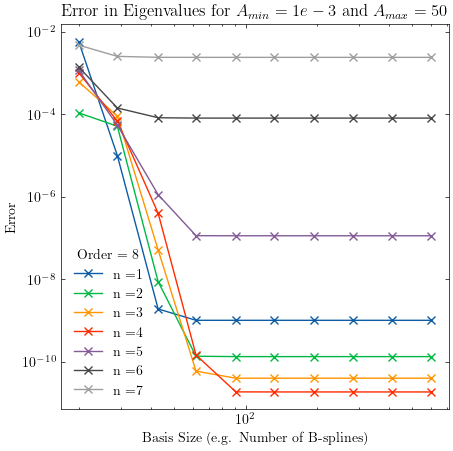

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(7):
    ax.plot(n_list_1[order_list_1 == 8], error_1[order_list_1 == 8, i], label=f'n ={i+1}', marker='x', color='C'+str(i))

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(title="Order = 8")
ax.set_xlabel('Basis Size (e.g. Number of B-splines)')
ax.set_ylabel('Error')
ax.set_title('Error in Eigenvalues for $A_{min} = 1e-3$ and $A_{max} = 50$')
plt.show()